Generation 1, Best Fitness: 0.7800
Generation 2, Best Fitness: 0.8200
Generation 3, Best Fitness: 0.8125
Generation 4, Best Fitness: 0.8275
Generation 5, Best Fitness: 0.8075
Generation 6, Best Fitness: 0.8700
Generation 7, Best Fitness: 0.8800
Generation 8, Best Fitness: 0.8825
Generation 9, Best Fitness: 0.8850
Generation 10, Best Fitness: 0.8825
Final Accuracy on Validation Set: 0.8900


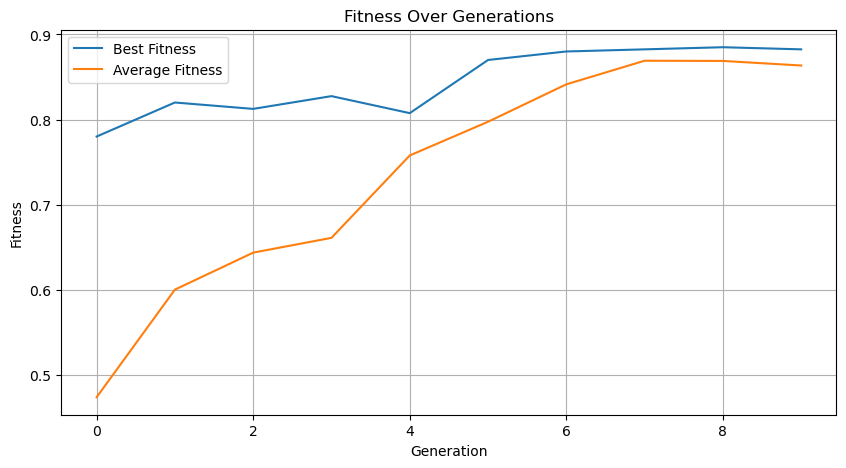

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Creating a sample dataset
X, y = make_classification(n_samples=500, n_features=10, n_informative=8, n_classes=2)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# Neural Network Structure
input_size = X.shape[1]
hidden_size = 5
output_size = 1

# Helper functions for the Neural Network
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def forward_pass(X, weights1, weights2):
    hidden_input = np.dot(X, weights1)
    hidden_output = sigmoid(hidden_input)
    output_input = np.dot(hidden_output, weights2)
    output = sigmoid(output_input)
    return output

def compute_fitness(weights):
    predictions = forward_pass(X_train, weights['w1'], weights['w2'])
    predictions = (predictions > 0.5).astype(int)
    accuracy = accuracy_score(y_train, predictions)
    return accuracy

# Genetic Algorithm Parameters
population_size = 20
generations = 10
mutation_rate = 0.1

# Initialize Population
population = []
for _ in range(population_size):
    individual = {
        'w1': np.random.randn(input_size, hidden_size),
        'w2': np.random.randn(hidden_size, output_size)
    }
    population.append(individual)

# Tracking performance
best_fitness_history = []
average_fitness_history = []

# Main Genetic Algorithm Loop
for generation in range(generations):
    # Evaluate Fitness of each Individual
    fitness_scores = np.array([compute_fitness(individual) for individual in population])
    best_fitness = np.max(fitness_scores)
    average_fitness = np.mean(fitness_scores)
    best_fitness_history.append(best_fitness)
    average_fitness_history.append(average_fitness)
    
    # Selection: Select top half of the population
    sorted_indices = np.argsort(fitness_scores)[::-1]
    population = [population[i] for i in sorted_indices[:population_size//2]]
    
    # Crossover and Mutation
    new_population = []
    while len(new_population) < population_size:
        parents = np.random.choice(population, 2, replace=False)
        child = {
            'w1': (parents[0]['w1'] + parents[1]['w1']) / 2,
            'w2': (parents[0]['w2'] + parents[1]['w2']) / 2
        }
        
        # Mutation
        if np.random.rand() < mutation_rate:
            child['w1'] += np.random.randn(*child['w1'].shape) * 0.1
            child['w2'] += np.random.randn(*child['w2'].shape) * 0.1
        
        new_population.append(child)
    
    population = new_population
    
    print(f"Generation {generation+1}, Best Fitness: {best_fitness:.4f}")

# Evaluate the best individual on validation set
best_individual = population[np.argmax(fitness_scores)]
predictions = forward_pass(X_val, best_individual['w1'], best_individual['w2'])
predictions = (predictions > 0.5).astype(int)
final_accuracy = accuracy_score(y_val, predictions)
print(f"Final Accuracy on Validation Set: {final_accuracy:.4f}")

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(best_fitness_history, label='Best Fitness')
plt.plot(average_fitness_history, label='Average Fitness')
plt.title('Fitness Over Generations')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)
plt.show()